# Objetivo da Análise de Dados

Este JupyterNotebook foi desenvolvido com base em um desafio proposto em uma das etapas do curso de Data Science da Alura em parceria com a Oracle. \
No desafio deveríamos deveríamos realizar uma Análise Exploratória em uma base de dados, com o objetivo de identificar possíveis "motivos e padrões" que estariam relacionados a uma alta taxa de evasão de clientes.
Essa análise deveria ser composto por 4 etapas principais:
- Extração das informações da base de dados;
- Transformação e formatação dos dados;
- Análise propriamente dita dos dados;
- Conclusão com base nos "insights" adquiridos

Procurei separar os blocos de código por ação, e adicionei comentários explicando sua função.

# Dicionário de dados

- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

# Importando as bibliotecas e base de dados

## 📌 Extracão

### Importacao das bibliotecas e base de dados


A importação dos dados está sendo feita a partir de um arquivo json, utilizando a biblioteca do Pandas, e sendo gerado um DataFrame com os dados obtidos. Para manter a base de dados original, durante todo o arquivo trabalhei com uma cópia. \
Por conta do formato json, algumas colunas do nosso DataFrame vieram com as informações aninhadas. Por isso foi necessário aplicar a função de normalização para 'desagrupar' essas informações; as colunas desagrupadas foram associadas a DataFrame separados.

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


# Obtendo o DataFrame principal
main = pd.read_json("TelecomX_Data.json")
main_df = main.copy()
display(main_df.head())



#  Normalizando as colunas com informacoes aninhadas
customer_df = pd.json_normalize(main_df["customer"])
phone_df = pd.json_normalize(main_df["phone"])
internet_df = pd.json_normalize(main_df["internet"])
account_df = pd.json_normalize(main_df["account"])

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## 🔧 Transformação

- Remover colunas que não são relevantes para a análise;
- Unir os dataframes para centralizar os dados em um único;
- Converter as colunas com valores "Yes" e "No" para valores booleanos;
- Transformar valores númericos que representam dinheiro, mas que estão como object;
- Verificar e remover duplicatas;

### Identificando os tipos de dados, valores nulos, valores ausentes e valores únicos

Nessa etapa realizei uma verificação inicial dos tipos de dados presentes em cada coluna. \
Depois, agrupei os DataFrames normalizados em um único DataFrame. \
Em seguida verifiquei a existência de valores nulos, vazios e duplicados. \
Por fim, criei uma função para converter os valores da coluna 'Charges.Total' para o formato numérico.

In [164]:
# Verificando os tipos de dados das colunas
main_df.info()



# Concatenando o DataFrame principal com os demais gerados pela normalização das colunas aninhadas
main_df = main_df[["customerID", "Churn"]]
main_df = pd.concat([main_df, customer_df, phone_df, internet_df, account_df], axis=1)
display(main_df.head(2))



# # Verificando a existencia de valores 'nulos' no DataFrame
print(main_df.isnull().sum())



# # Verificando a existencia de valores 'Nan' no DataFrame
print(main_df.isna().sum())



# Analisando os dados únicos das colunas procurando por inconsistências e formatações necessárias
for col in main_df.columns:
    print(main_df[col].unique())



# Criando uma função para converter as strings da coluna "Charges.Total" em dados numéricos do tipo float
def toFloat(val):
    if val != " ":
        return float(val)
    else:
        return 0



# Convertendo a coluna "Charges.Total" para o tipo numérico float e verificando as modificações
main_df["Charges.Total"] = main_df["Charges.Total"].apply(lambda x: toFloat(x))
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-

### Verificando os dados da coluna principal - Churn

Visto que nossa análise se baseia na taxa de evasão de clientes, a coluna que nos dá a informação de que o cliente saiu ou não é a coluna "Churn". Logo ela é a principal onde basearemos boa parte da análise. \
Explorei algumas características dessa colunas, como a distribuição dos valores, quais valores únicos possui, seu comprimento.

Percebi que uma porcentagem dos dados eram strings vazias. Esse percentual representa cerca de 3% da nossa base de dados total; logo, removê-los não implicará em uma grande perda de informações.

In [165]:
# Verificando os dados da coluna a "Churn"
print(main_df["Churn"].value_counts())
print(main_df["Churn"].unique())
print(len(main_df))

# Aplicando um filtro para remover os dados dessa coluna que são strings vazias
main_df = main_df[main_df["Churn"]!=""]
print(len(main_df))

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
['No' 'Yes' '']
7267
7043


### Convertendo algumas colunas para valores booleanos

Algumas das colunas da nossa base de dados estão em um formato que podem ser convertidos para valores booleanos. Por exemplo, dados como:
- "Yes" ou "No";
- "1" ou "0".

Criei a função "converter" para transformar esses valores para o tipo booleano. Assim, além de padronizar as informações também prepara os dados para futuramente aplicarmos conceitos mais profundos e avançados de análise.

In [166]:
# Gerando uma lista das colunas em que se aplicam a formatação para o tipo booleano
print(main_df.columns)
display(main_df.head())
lista = ["Churn", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]



# Criando a função que fará a conversão
def converter(valor):
    if valor == "Yes" or valor == 1:
        return True
    else :
        return False



# Aplicando a função criada
for col in lista:
    main_df[col] = main_df[col].apply(lambda x: converter(x))



# Verificando o resultado
display(main_df.head(5))

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,False,False,...,True,False,True,True,False,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,True,False,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,False,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,False,False,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,False,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40


### Adicionando a coluna "Charges.Daily"

Essa coluna representará as cobranças diárias que cada cliente "possui", o que permite verificar mais detalhadamente o comportamento deles com o passar do tempo.

Ela se baseia na divisão dos dados presentes na coluna "Charges.Monthly", dividos por um mês considerando 30 dias.

In [167]:
# Adicionando a coluna "Charges.Daily"
main_df["Charges.Daily"] = round(main_df["Charges.Monthly"]/30, 1)
display(main_df.head(2))

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0002-ORFBO,False,Female,False,True,True,9,True,False,False,...,False,True,True,False,One year,True,Mailed check,65.6,593.3,2.2
1,0003-MKNFE,False,Male,False,False,False,9,True,True,False,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.4,2.0


### Removendo colunas que não serão utilizadas

Todas as colunas que não serão utilizadas na análise serão removeidas através da função drop(). \
Dessa maneira conseguimos manter o arquivo de trabalho mais otimizados, semprecisa rficar carregando informações e a base com que vamos trabalhar se torna mais objtiva e clara, sem informações desnecessárias.

In [168]:
# Utilizando a função drop() e passando uma lista com as colunas que desejo remover
main_df = main_df.drop(['customerID','Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling'], axis=1)
main_df.head(2)

,Churn,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,StreamingTV,StreamingMovies,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,False,Female,False,9,True,False,False,True,False,One year,Mailed check,65.6,593.3,2.2
1,False,Male,False,9,True,True,False,False,True,Month-to-month,Mailed check,59.9,542.4,2.0


## 📊 Carga e análise

### Dimensionando a quantidade e proporção dos clientes que saíram

Aqui o objetivo descobrir quanto da nossa base de dados, em percentual, representam os clientes que saíram ( e também os que permaneceram). \
Para isso, criei um DataFrame filtrando apenas a parcela de clientes que saiu e um com a dos que permaneceram. Já fiz também uma Análise Descritiva (média, mediana e desvio padrão) com as colunas numéricas de cada um.

Por fim, utilizando a biblioteca Matplotlib, gerei um gráfico que pizza para representar visualmente a distribuição.

In [169]:
# Gerando um DataFrame com os clientes que deram "Churn"
churn_df = main_df.query("Churn==True")



# DataFrame de clientes que nao deram Churn
df = main_df.query("Churn==False")
print(main_df.describe())
print(churn_df.describe())

            tenure  Charges.Monthly  Charges.Total  Charges.Daily
count  7043.000000      7043.000000    7043.000000    7043.000000
mean     32.371149        64.761692    2279.734304       2.160173
std      24.559481        30.090047    2266.794470       1.000961
min       0.000000        18.250000       0.000000       0.600000
25%       9.000000        35.500000     398.550000       1.200000
50%      29.000000        70.350000    1394.550000       2.300000
75%      55.000000        89.850000    3786.600000       3.000000
max      72.000000       118.750000    8684.800000       4.000000
            tenure  Charges.Monthly  Charges.Total  Charges.Daily
count  1869.000000      1869.000000    1869.000000    1869.000000
mean     17.979133        74.441332    1531.796094       2.480417
std      19.531123        24.666053    1890.822994       0.822458
min       1.000000        18.850000      18.850000       0.600000
25%       2.000000        56.150000     134.500000       1.900000
50%      1

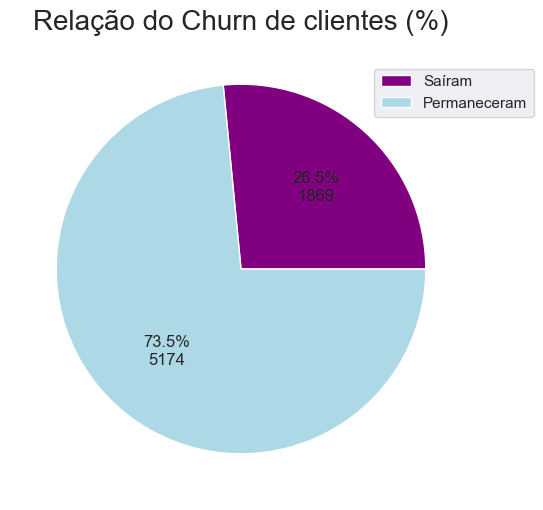

In [170]:
# Função para colocar as legendas de texto no gráfico de pizza
def textoPie(pct, vals):
    abs = int(pct/100*sum(vals))
    return f"{pct:.1f}%\n{abs}"



# Gráfico de pizza exibindo as porcentagens
fig, ax = plt.subplots(figsize=(8,6))
grupos = "Saíram", "Permaneceram"
fatias = [len(churn_df), len(df)]
ax.set_title("Relação do Churn de clientes (%)", fontsize=20)
ax.pie(fatias, autopct=lambda pct: textoPie(pct, fatias), colors=["purple", "lightblue"])
ax.legend(grupos, bbox_to_anchor=(1.15, 0.95))
plt.show()

### Explorando quantos dos clientes possuem mais ou menos de 65 anos

O objetivo nessa parte é descobrir como a idade superior aos 65 anos poderia se relacionar com a taxa de evasão dos clientes. \
Dessa forma, utilizando os DataFrames seprados por clientes que saíram e os que permaneceram, e mais uma vez com o auxílio da biblioteca do matplotlib, foram gerados dois gráficos de barra. \
Cada gráfico, em uma única figura, apresentam as informações e proporções de clientes que em cada situação (se permaneceram ou saíram) com base na idade ser maior ou menor do que 65.

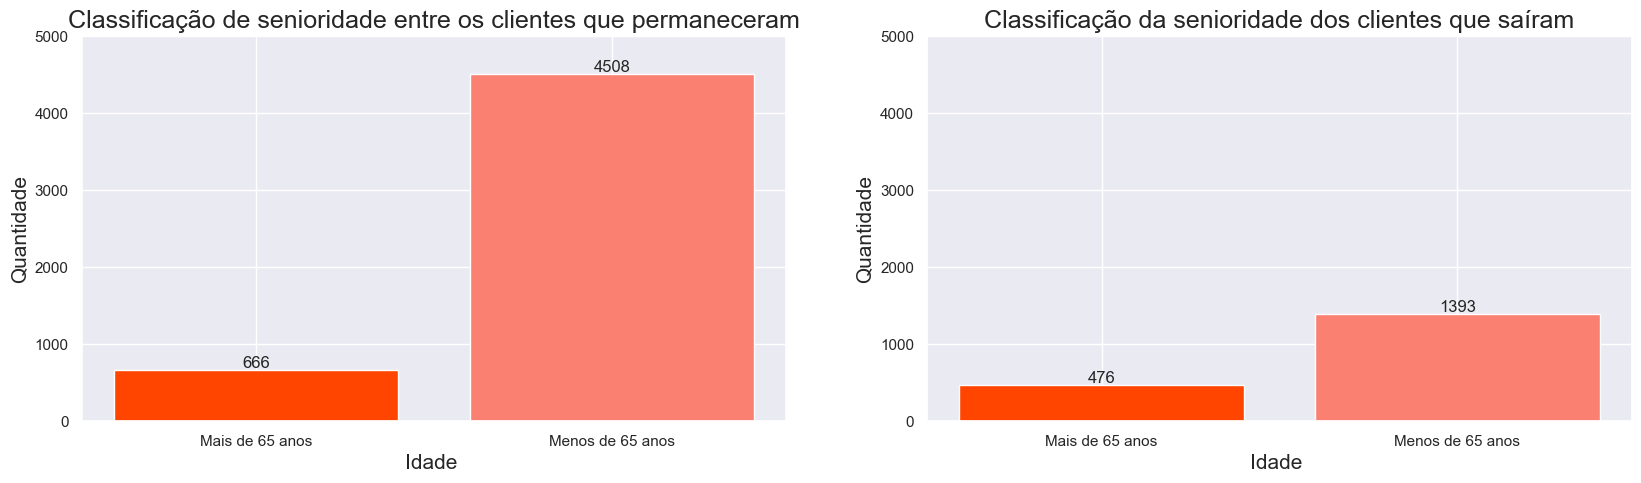

In [175]:
# Parcela de clientes que permaneceu
acima_65 = df.query("SeniorCitizen==True")
abaixo_65 = df.query("SeniorCitizen==False")

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title("Classificação de senioridade entre os clientes que permaneceram", fontsize=18)
ax[0].bar(["Mais de 65 anos", "Menos de 65 anos"], [len(acima_65), len(abaixo_65)], color=["orangered", "salmon"])
ax[0].set_ylabel("Quantidade", fontsize=15)
ax[0].set_xlabel("Idade ", fontsize=15)
ax[0].set_ylim(0, 5000)
for idx, val in enumerate([acima_65, abaixo_65]):
    ax[0].text(idx, len(val)+25, str(len(val)), ha="center")



# Parcela dos clientes que evadiu
acima_65 = churn_df.query("SeniorCitizen==True")
abaixo_65 = churn_df.query("SeniorCitizen==False")
ax[1].set_title("Classificação da senioridade dos clientes que saíram", fontsize=18)
ax[1].bar(["Mais de 65 anos", "Menos de 65 anos"], [len(acima_65), len(abaixo_65)], color=["orangered", "salmon"])
ax[1].set_ylabel("Quantidade", fontsize=15)
ax[1].set_xlabel("Idade ", fontsize=15)
ax[1].set_ylim(0, 5000)
for idx, val in enumerate([acima_65, abaixo_65]):
    ax[1].text(idx, len(val)+25, str(len(val)), ha="center")
plt.show()

### Distribuição dos tipos de contrato

O objetivo dessa parte da análise é descobrir que relação pode haver entre os tipos de contrato e o índice de evasão de clientes. \
Nesse caso, eu verifiquei primeiro os tipos de contrato com suas respectivas quantidades com a base de dados completa, sem separação. \
Em seguida, explorwi em qual parcela de clientes esses números poderiam fornecer algum indicador. O que percebi é que o tipo de contrato que mais se destaca é o do tipo "Month-to-month".

Dentre o total desse tipo de contrato "Month-to-month", mais de 40% pertenciam aos clientes que evadiram, uma informação valiosa extraída, que pode ser observada no gráfico "Distruibuição do contrato Month-to-month"

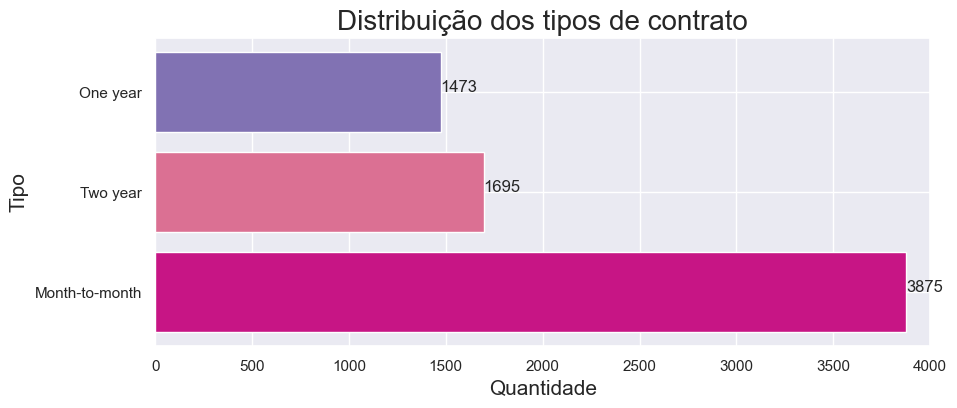

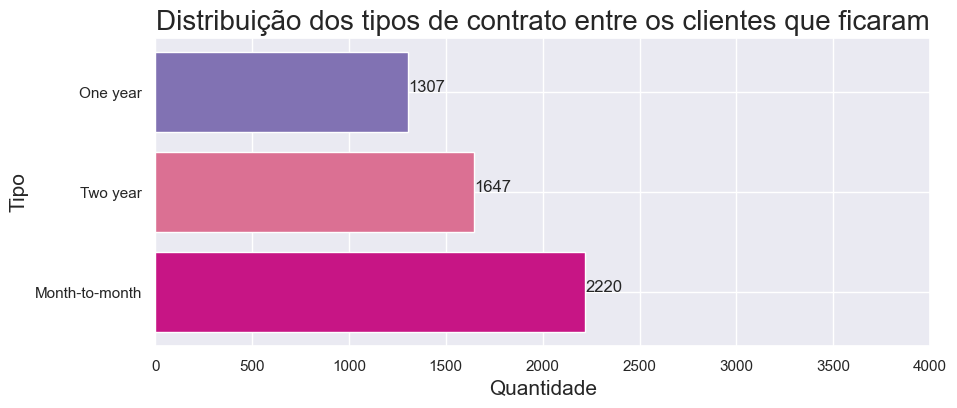

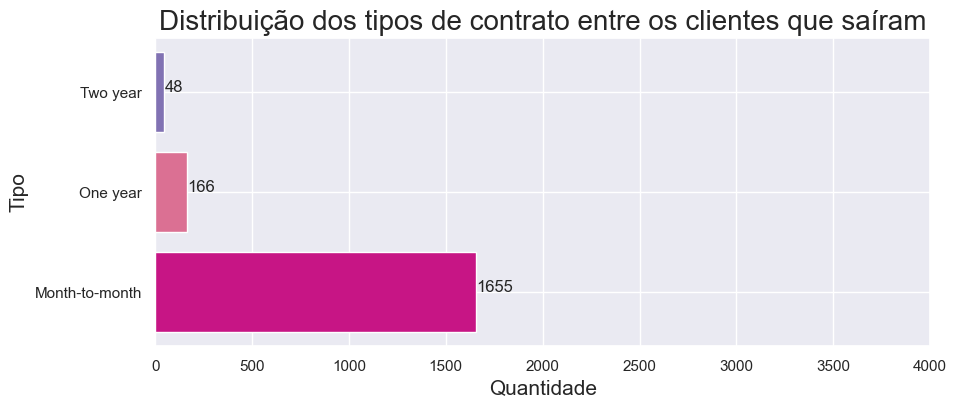

In [ ]:
# Tipo de contrato da base de dados total
lista = pd.DataFrame(main_df["Contract"].value_counts())

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Distribuição dos tipos de contrato", fontsize=20)
ax.barh(lista.index, lista["count"], color=["mediumvioletred", "palevioletred", "m"])
ax.set_ylabel("Tipo", fontsize=15)
ax.set_xlabel("Quantidade", fontsize=15)
ax.set_xlim(0, 4000)
for idx, val in enumerate(lista["count"]):
    ax.text(val, idx, str(val))
plt.show()



# Analisando somente pelos clientes que permaneceram
lista = pd.DataFrame(main_df.query("Churn==False")["Contract"].value_counts())
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Distribuição dos tipos de contrato entre os clientes que ficaram", fontsize=20)
ax.set_xlabel("Quantidade", fontsize=15)
ax.set_ylabel("Tipo", fontsize=15)
ax.set_xlim(0, 4000)
ax.barh(lista.index, lista["count"], color=["mediumvioletred", "palevioletred", "m"])

for idx, val in enumerate(lista["count"]):
    ax.text(val, idx, str(val))



# Analisando apenas entre os clientes que optaram por sair
lista = pd.DataFrame(churn_df["Contract"].value_counts())
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_title("Distribuição dos tipos de contrato entre os clientes que saíram", fontsize=20)
ax.barh(lista.index, lista["count"], color=["mediumvioletred", "palevioletred", "m"])
ax.set_xlabel("Quantidade", fontsize=15)
ax.set_ylabel("Tipo",  fontsize=15)
ax.set_xlim(0, 4000)
for idx, val in enumerate(lista["count"]):
    ax.text(val , idx, str(val))

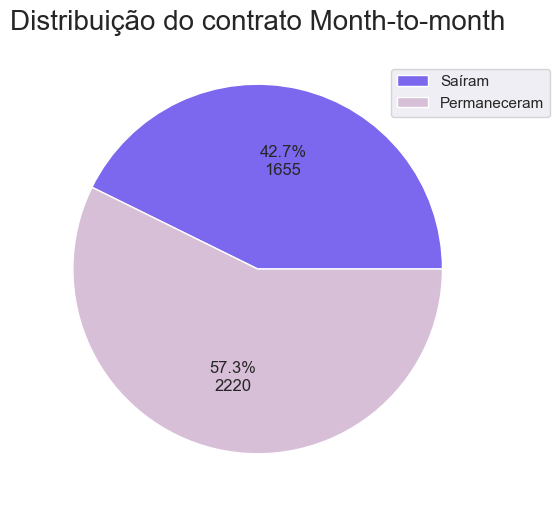

In [ ]:
# Analisando a distribuição do contrato do tipo "Month-to-month" entre os clientes que saíram e os que permaneceram
contrato_mensal = main_df[["Churn", "Contract"]].query("Contract=='Month-to-month'")
contrato_mensal1 = contrato_mensal.query("Churn==True")
contrato_mensal2 = contrato_mensal.query("Churn==False")
grupos = "Saíram", "Permaneceram"
fatias = [len(contrato_mensal1), len(contrato_mensal2)]



# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Distribuição do contrato Month-to-month", fontsize=20)
ax.pie(fatias, autopct=lambda pct: textoPie(pct, fatias), colors=["mediumslateblue", "thistle"])
ax.legend(grupos, bbox_to_anchor=(1.15, 0.95))
plt.show()

### Distribuição de gênero

Nesse ponto, o foco é obter informações sobre existir uma ligação entre o gênero dos clientes e a taxa de evasão. \
Assim como em outras partes, fiz a geração de dois gráficos separados, um para cada parcela dos clientes (os que evadiram e os que permaneceram)

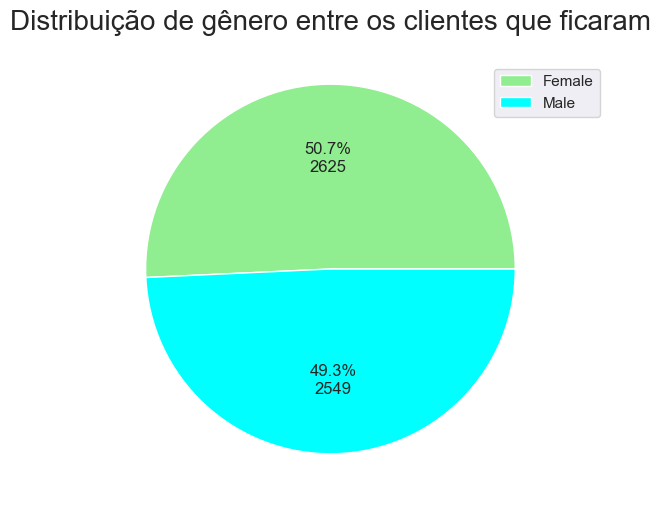

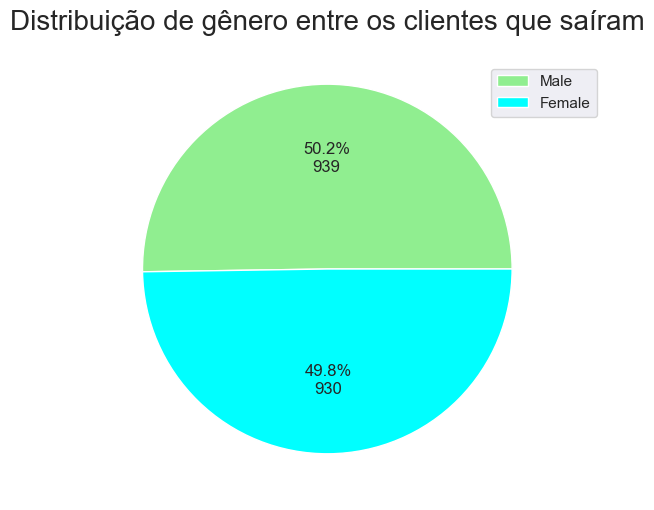

In [ ]:
# Parcela dos clientes que ficaram
df = pd.DataFrame(main_df.query("Churn==False"))
generos = df["gender"].unique()
fatias = df["gender"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(fatias, autopct= lambda x: textoPie(x, fatias), colors=["lightgreen", "cyan"])
ax.legend(generos, bbox_to_anchor=(1.1, 0.95))
ax.set_title("Distribuição de gênero entre os clientes que ficaram", fontsize=20)
plt.show()



# Parcela dos clientes que evadiram
generos = churn_df["gender"].unique()
fatias = churn_df["gender"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(fatias, autopct= lambda x: textoPie(x, fatias), colors=["lightgreen", "cyan"])
ax.legend(generos, bbox_to_anchor=(1.1, 0.95))
ax.set_title("Distribuição de gênero entre os clientes que saíram", fontsize=20)
plt.show()

### Métodos de pagameto

Aqui, analisei se há alguma relação entre os tipos de pagamentos utilizados pelos clientes que saíram. \
Baseado na coluna "PaymentMethod", gerei um gráfico de pizza com o total e porcentagem que cada meio de pagamento possui.

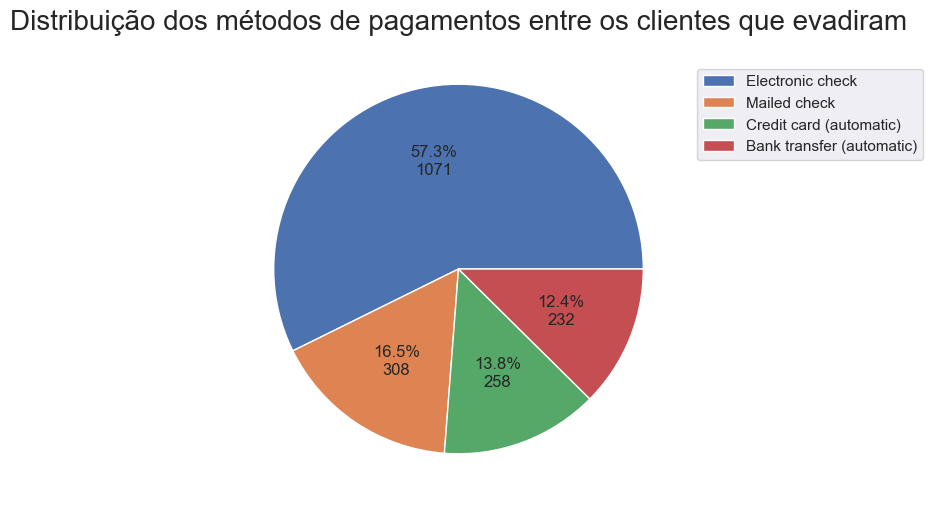

In [ ]:
metodos = churn_df["PaymentMethod"].unique()
quantidade = churn_df["PaymentMethod"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Distribuição dos métodos de pagamentos entre os clientes que evadiram", fontsize=20)
ax.pie(quantidade, autopct = lambda x: textoPie(x, quantidade))
ax.legend(metodos, bbox_to_anchor=(1, 0.95))
plt.show()

### Serviço de Telefone e Internet

Uma informação simples e óbvia era entender quantos dos clientes que evadiram, tinham contratado os serviços de Telefone e Internet. \
Utilizando as colunas"PhoneService" e "InternetService", criei dois gráficos com a distribuição de cada serviço pela base de clintes que evadiu.

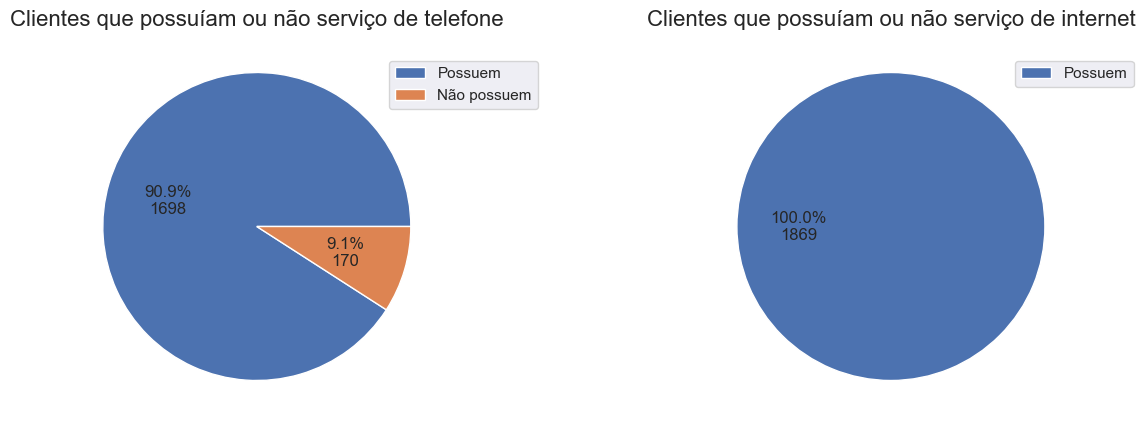

In [ ]:
telefone = churn_df["PhoneService"].value_counts()
status = "Possuem", "Não possuem"
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set_title("Clientes que possuíam ou não serviço de telefone", fontsize=16)
ax[0].pie(telefone, autopct= lambda x: textoPie(x, telefone))
ax[0].legend(status,  bbox_to_anchor=(1.25, 0.95))

internet = churn_df["InternetService"].value_counts()
status = "Possuem", "Não possuem"
# fig, ax = plt.subplots(figsize=(8, 6))
ax[1].set_title("Clientes que possuíam ou não serviço de internet", fontsize=16)
ax[1].pie(internet, autopct= lambda x: textoPie(x, internet))
ax[1].legend(status,  bbox_to_anchor=(1.15, 0.95))
plt.show()

### Serviço de Múltiplas Linhas de telefone

A fim de complementar a análise acima, verifiquei também a assinatura do serviço de múltiplas linhas de telefone poderia ou não ser relacionar com a taxa de evasão dos clientes. \
Por meio da coluna "MultipleLines" elaborei um gráfico de pizza que permite visualizar quantos dos clientes que saíram assinavam ou não esse serviço.

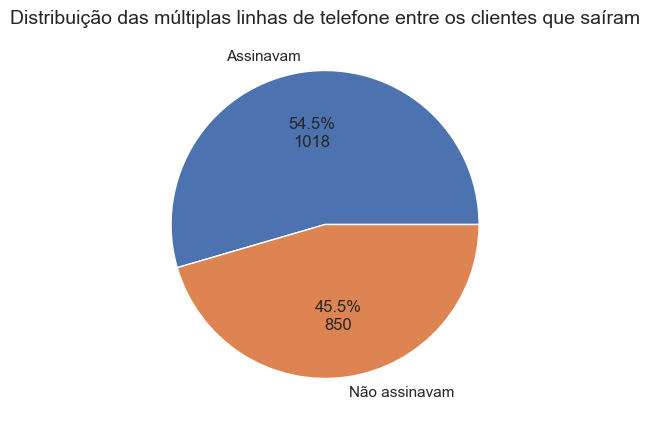

In [177]:
fig, ax = plt.subplots(figsize=(8, 5))
fatias = churn_df["MultipleLines"].value_counts()

ax.set_title("Distribuição das múltiplas linhas de telefone entre os clientes que saíram", fontsize=14)
ax.pie(fatias, labels = status, autopct = lambda x: textoPie(x, fatias))
plt.show()

### Distribuição do total gasto

Entender o total gasto pelos clientes tmabém pode nos fornecer percepçoes importantes. \
Assim utilizando a coluna "Charges.Total" procurei explorar uma possível relação entre as duas partes dos clientes, pricipalmente os que evadiram. Para facilitar a visualização, gerei dois Histogramas, que nos permiter visualizar mais detalhadamente essas informações.

A partir daí conseguimos obte um outro dado importante, a maior parte dos clientes que evadiu, tinham um gasto total que não ultrapassava os U$500.

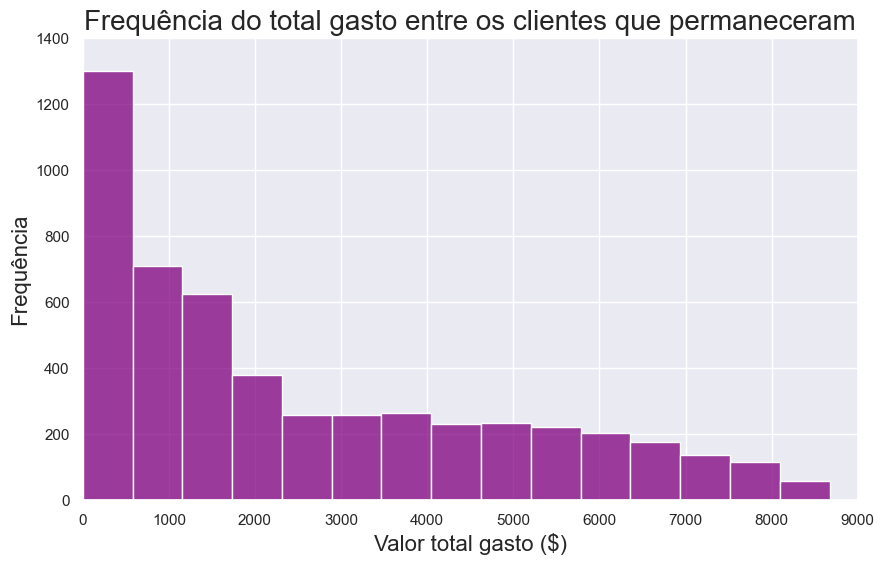

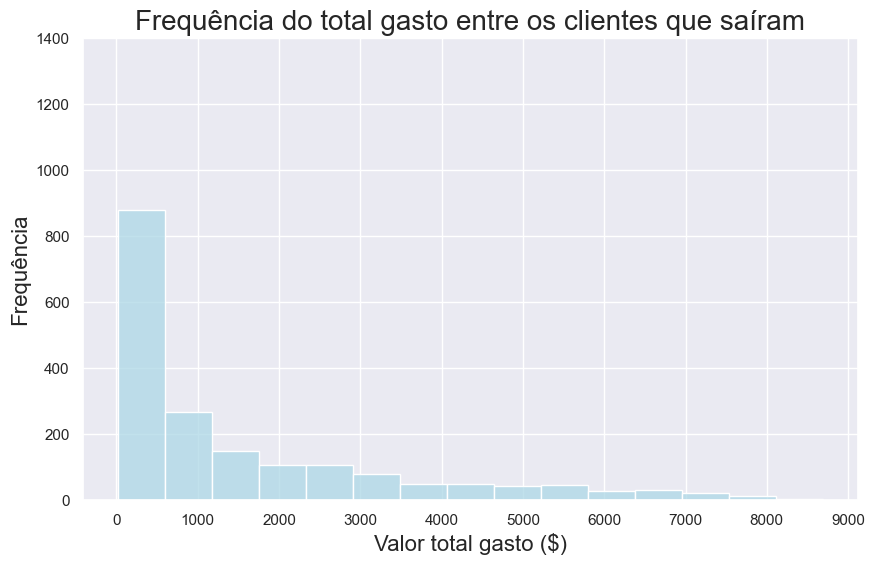

In [ ]:
# Gerando um histograma com os dados dos clientes que permaneceram
no_churn_df = main_df.query("Churn!=True")
xticks = [val for val in range(0, 10000, 1000)]
yticks = [val for val in range(0, 1600, 200)] 
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(data=no_churn_df, x="Charges.Total", bins=15, color="purple")
ax.set_title("Frequência do total gasto entre os clientes que permaneceram", fontsize=20)
ax.set_xlabel("Valor total gasto ($)", fontsize=16)
ax.set_ylabel("Frequência", fontsize=16)
ax.set_xlim(0, 9000)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()



# Gerando um histograma com os dados dos clientes que saíram
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(data=churn_df, x="Charges.Total", bins=15, color="lightblue")
ax.set_title("Frequência do total gasto entre os clientes que saíram", fontsize=20)
ax.set_xlabel("Valor total gasto ($)", fontsize=16)
ax.set_ylabel("Frequência", fontsize=16)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.show()

### Tempo de Contrato

Explorar a distibuiçao do tempo de contrato entre os clientes, também poderia nos garantir percepções essenciais. \
Por meio da coluna "tenure" e com a geração de dosi histogramas, busquei entender como o tempo de contrato se distribuía entre as duas partes de clientes. \
Graças a isso, mais um levantamento significativo foi gerado: a maior parte dos clientes que saiu possuía um tempo de contrato inferior aos 5 meses.

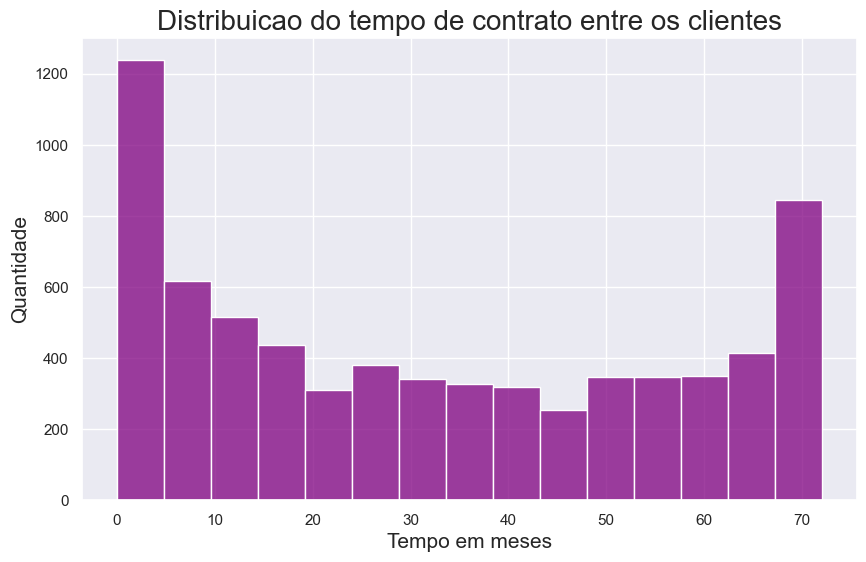

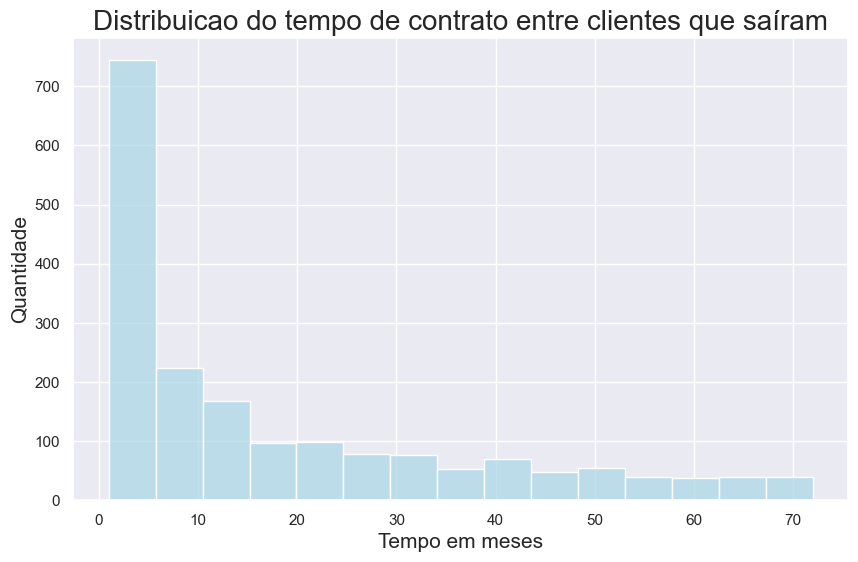

In [ ]:
# Analisando primeiro somente a parcela de clientes que nao evadiram
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(data=main_df, x="tenure", bins=15, color="purple")
ax.set_title("Distribuicao do tempo de contrato entre os clientes", fontsize=20)
ax.set_xlabel("Tempo em meses", fontsize=15)
ax.set_ylabel("Quantidade", fontsize=15)
plt.show()



# Analisando a parcela de clientes que evadiram
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.histplot(data=churn_df, x="tenure", bins=15, color="lightblue")
ax.set_title("Distribuicao do tempo de contrato entre clientes que saíram", fontsize=20)
ax.set_xlabel("Tempo em meses", fontsize=15)
ax.set_ylabel("Quantidade", fontsize=15)
plt.show()

### Serviços de Streaming de televisão e de Streaming de filmes

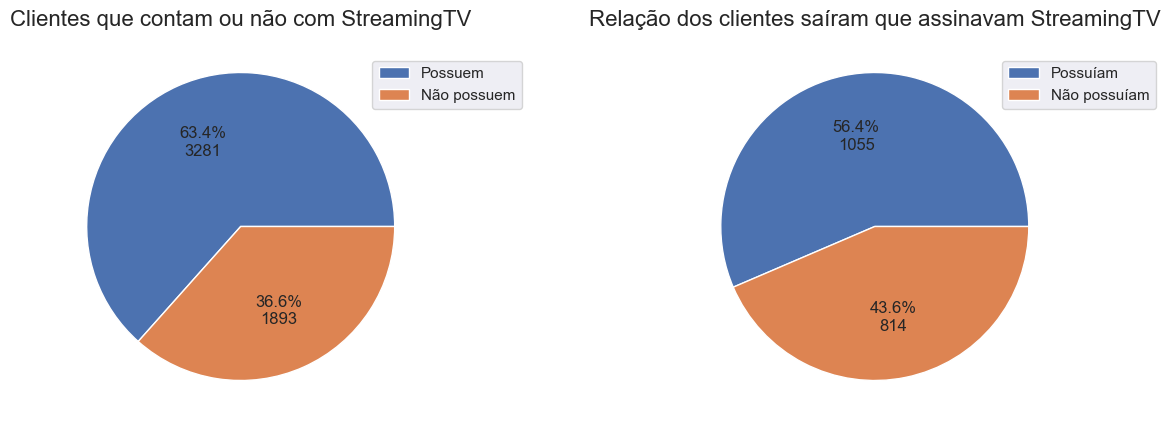

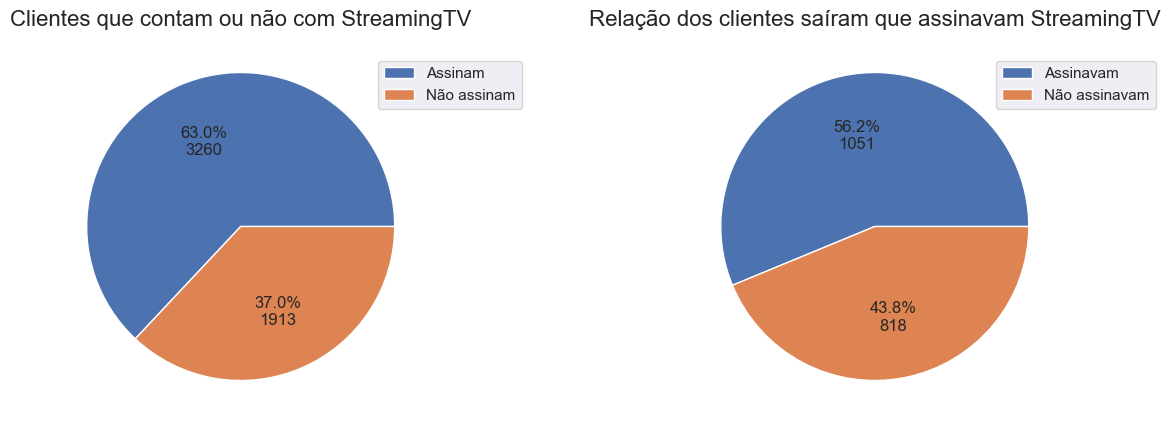

In [ ]:
# Analisando StreamingTV
# Verificando primeiro pela porção de clientes que ficou
status = "Possuem", "Não possuem"
fatias = no_churn_df["StreamingTV"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("Clientes que contam ou não com StreamingTV", fontsize=16)
ax[0].pie(fatias, autopct=lambda x: textoPie(x, fatias))
ax[0].legend(status, bbox_to_anchor=(1.25, 0.95))



# Entre os que evadiram
status = "Possuíam", "Não possuíam"
fatias = churn_df["StreamingTV"].value_counts()
ax[1].set_title("Relação dos clientes saíram que assinavam StreamingTV", fontsize=16)
ax[1].pie(fatias, autopct=lambda x: textoPie(x, fatias))
ax[1].legend(status, bbox_to_anchor=(1.25, 0.95))
plt.show()



# Analisando StreamingMovies
# Verificando primeiro pela porcao de clientes que ficou
status = "Assinam", "Não assinam"
fatias = no_churn_df["StreamingMovies"].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title("Clientes que contam ou não com StreamingTV", fontsize=16)
ax[0].pie(fatias, autopct=lambda x: textoPie(x, fatias))
ax[0].legend(status, bbox_to_anchor=(1.25, 0.95))



# Entre os que evadiram
status = "Assinavam", "Não assinavam"
fatias = churn_df["StreamingMovies"].value_counts()
ax[1].set_title("Relação dos clientes saíram que assinavam StreamingTV", fontsize=16)
ax[1].pie(fatias, autopct=lambda x: textoPie(x, fatias))
ax[1].legend(status, bbox_to_anchor=(1.25, 0.95))
plt.show()

## 📄Conclusão Final

Ao final da análise da taxa de evasão dos clientes da Telecom X, conseguimos obter 3 levantamentos que se destacam dentre os demais:

- cerca de 42% dos contratos dos tipo Month-to-month pertenciam aos clientes que saíram;
- a maior parte total gasto entre os clientes qu saíram se concentra entre U$0 e U$500; e
- a maior parte da distribuição do tempo de contrato entre os clientes que saíram é inferior aos 5 meses.


Sendo assim, levando em conta esses levantamentos inicias, algumas sugestões de ações que podem ser tomadas são:

- melhorar as condições dos contratos do tipo mensal, com parceiras com outras empresas que poderiam complementar ainda mais o serviços oferecidos. Ou então, focar em campanhas, seja por descontos e promoções que incentivem os clientes a migraram para os outros tipos de contrato;

- oferecer benefícios e promoções para os clientes a partir de um determinado período de contrato, na tentativa de mantê-los e fidelizá-los, evitando que saíam ainda durante os meses iniciais.